In [199]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import random

In [200]:
def read_datafile(filename):
    df = pd.read_csv(filename,delimiter='\s+')
    X = df.values
    return X

In [201]:
X = read_datafile('moons.txt')

In [207]:
class KMeansClustering:
    def __init__(self,K):
        self.K = K
        self.centroids = np.zeros(self.K)
        self.cluster_wise_data = {}

    def SSE(self):
        sum = 0
        for i in range(self.K):
            for data in self.cluster_wise_data[i]:
                sum += np.sum((data-self.centroids[i])**2)
        return sum

    def fit(self,X):
        self.X = X
        self.N = len(self.X)
        self.centroids = self.X[np.random.randint(0,len(self.X),self.K)]

        prev = 2e10
        
        while(True):
            self.cluster_wise_data = {}

            for k in range(self.K):
                self.cluster_wise_data[k] = []

            for i in range(self.N):
                dists = []
                for j in self.centroids:
                    dist = np.linalg.norm(self.X[i]-j)
                    dists.append(dist)
                self.cluster_wise_data[np.argmin(dists)].append(self.X[i])

            for k in range(self.K):
                self.centroids[k] = np.array(self.cluster_wise_data[k]).mean(axis=0)
            
            curr = self.SSE()

            if prev == curr:
                break
            else:
                print("SSE: ",curr)
                prev = curr
            

    def plot(self):
        for k in range(self.K):
            rgb = (random.random(), random.random(), random.random())
            for data in self.cluster_wise_data[k]:
                plt.scatter(data[0],data[1],c=[rgb])

In [208]:
model = KMeansClustering(K=10)

In [209]:
model.fit(X)

SSE:  242.6561798393674
SSE:  195.49933177995243
SSE:  174.1337186056172
SSE:  161.61170144810666
SSE:  154.01381964042915
SSE:  149.4363077808758
SSE:  145.82024094742758
SSE:  143.5561367781454
SSE:  140.8071385489563
SSE:  138.2526988559635
SSE:  135.85365985391059
SSE:  133.30484370570974
SSE:  131.30504826059496
SSE:  129.07645108149984
SSE:  127.27040431532109
SSE:  126.10966931541199
SSE:  124.94974011699817
SSE:  124.08695220447268
SSE:  123.1653209290383
SSE:  122.32456668200399
SSE:  121.58436515719112
SSE:  120.8247468579771
SSE:  120.1435532454517
SSE:  119.68605135315276
SSE:  119.37244362949262
SSE:  119.18685122036034
SSE:  118.9924063474454
SSE:  118.8417801726686
SSE:  118.77635057716408
SSE:  118.74393404125303
SSE:  118.7286383655235
SSE:  118.72215904944174
SSE:  118.70074150133577
SSE:  118.6681030946935
SSE:  118.6595630201238
SSE:  118.6477883054596
SSE:  118.63905259003386
SSE:  118.63602679274999


In [210]:
model.centroids

array([[-0.90213713,  0.37828392],
       [-0.39813584,  0.90160889],
       [ 0.30886425, -0.2268873 ],
       [ 0.04618114,  0.23920086],
       [ 0.80383991, -0.44831978],
       [ 1.77386902, -0.15103454],
       [ 1.97073232,  0.27755411],
       [ 0.88726799,  0.41318562],
       [ 0.32319128,  0.91990534],
       [ 1.35163571, -0.42486126]])

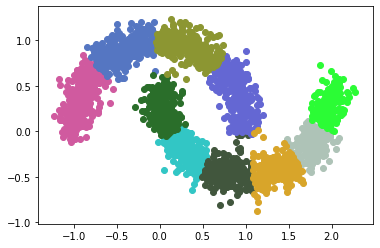

In [211]:
model.plot()